# Perplexity ratio data

Let's take a look at the perplexity ratio score data generated with the v2 scoring algorithm.

In [1]:
# Change working directory to parent so we can import as we would from __main__.py
%cd ..

import pickle

import classes.feature_engineering as feature_engineering
import functions.notebook_helper as helper_funcs
import functions.notebook_plotting as plot_funcs
import configuration as config

/mnt/arkk/llm_detector/classifier


Load the scored text fragment data from the Hans 2024 corpus:

In [2]:
# Instantiate feature engineering class instance. This will read the input data file
# from the configuration file by default, load the data, fix d-types, shuffle, train
# test split and then put data from each original source dataset as well as the
# aggregate into nested holder class instances for easy access later.
data = feature_engineering.FeatureEngineering()

# What datasets do we have?
print(f'\nTop level attributes: {list(vars(data).keys())}\n')
print(f'Data loaded from: {data.raw_input_data_file_name}')
print(f'Original dataset sources: {list(data.dataset_names)}')
print(f'Generation models: {list(data.generation_models)}\n')
print(f'data.all contains: {list(vars(data.all).keys())}')
print(f'Training/testing data contains: {list(vars(data.training).keys())}\n')

print(f'Example dataset data.all.human:\n')
data.all.human.info()


Top level attributes: ['raw_input_data_file_name', 'all', 'dataset_names', 'generation_models', 'training', 'testing']

Data loaded from: /mnt/arkk/llm_detector/classifier/data/hans_2024/falcon-7b_scores_v2.1.json
Original dataset sources: ['cc_news', 'cnn']
Generation models: ['falcon7']

data.all contains: ['combined', 'synthetic_combined', 'falcon7', 'human']
Training/testing data contains: ['all', 'cc_news', 'cnn']

Example dataset data.all.human:

<class 'pandas.core.frame.DataFrame'>
Index: 2102 entries, 3 to 4199
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Source record num         2102 non-null   int64  
 1   Fragment length (words)   2102 non-null   int64  
 2   Fragment length (tokens)  2102 non-null   int64  
 3   Dataset                   2102 non-null   object 
 4   Source                    2102 non-null   object 
 5   Generator                 2102 non-null   object 


## Data exploration
Make some plots with perplexity ratio score and related variables see what we are working with:

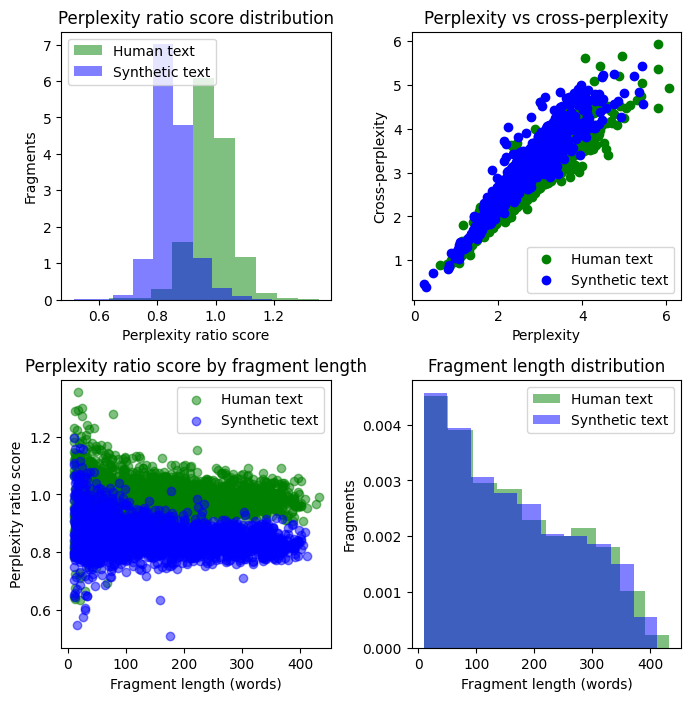

In [3]:
plot_funcs.data_exploration_plot(data).show()

Looks OK. Perplexity ratio score distributions look clearly different. Also, there is some fragment length dependence of perplexity ratio score.

Let's take a look at text fragments from the individual original source datasets. Make a boxplot showing the difference in perplexity ratio score distribution for human and synthetic text fragments, split by the original dataset source.

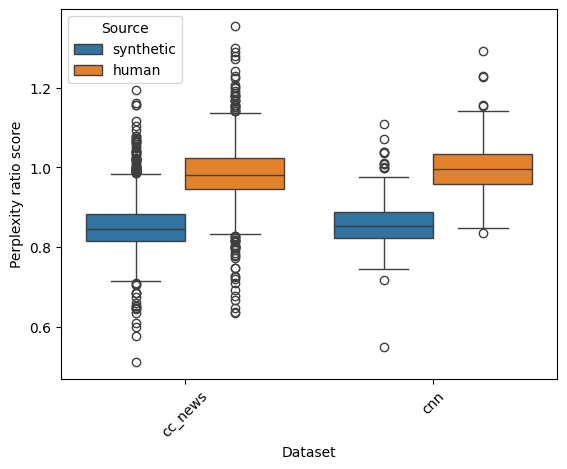

In [4]:
plot_funcs.perplexity_ratio_by_dataset(data).show()

OK, all look fairly similar-ish. One source dataset doesn't obviously stand out as much better or worse than the others in terms of separation of human vs synthetic perplexity ratio distribution.

Make another boxplot showing the difference in perplexity ratio score distribution for human and synthetic text fragments, this time with the fragments binned by length. This will give us a cleaner picture of how well the perplexity ratio score separates fragments in different length regimes.

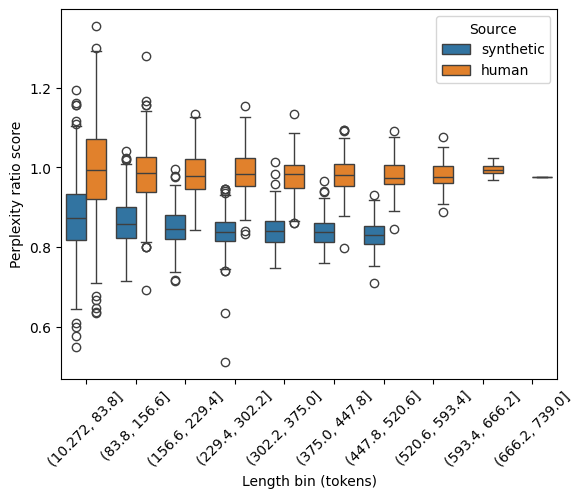

In [5]:
plot_funcs.perplexity_ratio_by_length(data).show()

Interesting - the difference in means looks fairly constant across the length bins. But, the perplexity ratio scores from shorter fragments have much larger spread. Let's generate confidence intervals around the difference in means for each length bin.

In [6]:
helper_funcs.mean_difference_ci(data)

Length bin: (83.8, 156.6] tokens
  Human mean: 0.983, synthetic mean: 0.862
  Difference in means = 0.121, 95% CI = (0.113, 0.130)
  p-value (human > synthetic) = 1.2712982465710264e-118

Length bin: (156.6, 229.4] tokens
  Human mean: 0.982, synthetic mean: 0.850
  Difference in means = 0.131, 95% CI = (0.124, 0.139)
  p-value (human > synthetic) = 5.9197470819516795e-136

Length bin: (302.2, 375.0] tokens
  Human mean: 0.979, synthetic mean: 0.841
  Difference in means = 0.138, 95% CI = (0.130, 0.146)
  p-value (human > synthetic) = 7.399481302179009e-129

Length bin: (10.272, 83.8] tokens
  Human mean: 0.991, synthetic mean: 0.878
  Difference in means = 0.113, 95% CI = (0.100, 0.127)
  p-value (human > synthetic) = 1.3218138689235026e-55

Length bin: (229.4, 302.2] tokens
  Human mean: 0.988, synthetic mean: 0.837
  Difference in means = 0.150, 95% CI = (0.142, 0.159)
  p-value (human > synthetic) = 3.747711066594233e-147

Length bin: (375.0, 447.8] tokens
  Human mean: 0.981, synt

OK, cool - at least in terms of central tendency, the perplexity ratio score does a pretty good job of separating human from synthetic fragments.

## Save the data

In [7]:
# Persist the feature engineering class instance so we can
# use it in other notebooks
output_file = config.FEATURE_ENGINEERING_CLASS_INSTANCE

with open(output_file, 'wb') as file:
    pickle.dump(data, file)

# Round trip it, just to make sure everything worked as expected
input_file = config.FEATURE_ENGINEERING_CLASS_INSTANCE

with open(input_file, 'rb') as file:
    loaded_data = pickle.load(file)

# What datasets do we have?
print(f'\nTop level attributes: {list(vars(loaded_data).keys())}\n')
print(f'Data loaded from: {loaded_data.raw_input_data_file_name}')
print(f'Original dataset sources: {list(loaded_data.dataset_names)}\n')
print(f'data.all contains: {list(vars(loaded_data.all).keys())}')
print(f'Training/testing data contains: {list(vars(loaded_data.training).keys())}\n')

print(f'Example dataset loaded_data.training.cc_news.human:\n')
loaded_data.training.cc_news.human.info()


Top level attributes: ['raw_input_data_file_name', 'all', 'dataset_names', 'generation_models', 'training', 'testing']

Data loaded from: /mnt/arkk/llm_detector/classifier/data/hans_2024/falcon-7b_scores_v2.1.json
Original dataset sources: ['cc_news', 'cnn']

data.all contains: ['combined', 'synthetic_combined', 'falcon7', 'human']
Training/testing data contains: ['all', 'cc_news', 'cnn']

Example dataset loaded_data.training.cc_news.human:

<class 'pandas.core.frame.DataFrame'>
Index: 1521 entries, 3 to 3359
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Source record num         1521 non-null   int64  
 1   Fragment length (words)   1521 non-null   int64  
 2   Fragment length (tokens)  1521 non-null   int64  
 3   Dataset                   1521 non-null   object 
 4   Source                    1521 non-null   object 
 5   Generator                 1521 non-null   object 
 6   String